In [38]:
#https://www.investopedia.com/terms/a/aroon.asp
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook

In [2]:
start='2014-1-1'
end='2016-3-31'
period = 25 #(days)

In [35]:
df = data.DataReader('MSFT', 'yahoo', start, end)

df['p_high'] = df['High'].rolling(window=period).max() == df['High']
df['p_low'] = df['Low'].rolling(window=period).min() == df['Low']
df.dropna(inplace=True)

a = 0
b = 0

for i in range(len(df.index)):
    if df['p_high'][i]:
        a = 0
    elif a < period:
        a += 1
    if df['p_low'][i]:
        b = 0
    elif b < period:
        b += 1
    df.loc[df.index[i], 'p_high'] = a
    df.loc[df.index[i], 'p_low'] = b


In [36]:
df['up'] = (1 - df['p_high'] / period) * 100
df['down'] = (1 - df['p_low'] / period) * 100
df['diff'] = df['up'] - df['down']

<IPython.core.display.Javascript object>


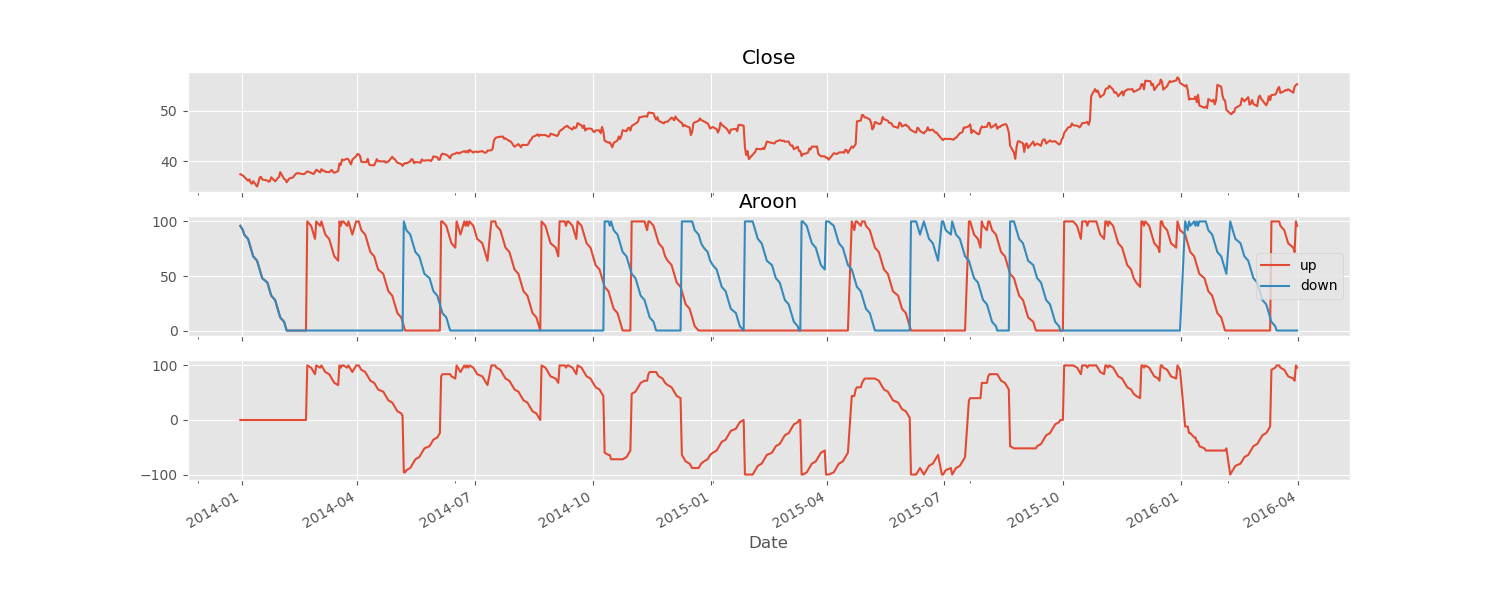

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(15,6),sharex=True)

df['Close'].plot(ax=axes[0]); axes[0].set_title('Close')
df[['up','down']].plot(ax=axes[1]); axes[1].set_title('Aroon')
df['diff'].plot(ax=axes[2]); axes[2]
plt.show()